# beeID Datasets Extraction

The purpose of this notebook is create a sets of small datasets to test identification.

#### Dependencies

In [54]:
%matplotlib inline
import numpy as np
from skimage import io
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
from ipywidgets import interact
import os
import sys
import shutil

sys.path.append("../")

from utils.datasets_utils import get_frame_id, get_track_id

PREPROCCESSED_DATA_DIR = '../datasets/body_sept/'

#### READ Test CSV file

In [55]:
test_csv_path = os.path.join(PREPROCCESSED_DATA_DIR, "test_pairs.csv")
test_data = pd.read_csv(test_csv_path)

In [56]:
test_data.head()

,Unnamed: 0,X1,X2,y
0,114599,../datasets/body_sept/test_data/track/003403/B...,../datasets/body_sept/test_data/track/003403/B...,0
1,29521,../datasets/body_sept/test_data/frame/017443/B...,../datasets/body_sept/test_data/frame/017443/B...,1
2,40710,../datasets/body_sept/test_data/frame/017047/B...,../datasets/body_sept/test_data/frame/017047/B...,1
3,161357,../datasets/body_sept/test_data/track/003068/B...,../datasets/body_sept/test_data/track/003068/B...,0
4,162363,../datasets/body_sept/test_data/track/003506/B...,../datasets/body_sept/test_data/track/003506/B...,0


Get a list with all images used in the test dataset. Merge X1 and X2 columns and apply unique to avoid duplicate filenames.

In [57]:
images_list = np.unique(test_data.X1.str.split("/").str[-1])
images_list = np.append(images_list, test_data.X2.str.split("/").str[-1])
images_list = np.unique(images_list)
print(images_list.shape)

(17123,)


### Counting amount of bees by frame

In [58]:
amount_bees_by_frame = defaultdict(int)
for im_fname in images_list:
    frame = get_frame_id(im_fname)
    amount_bees_by_frame[frame] += 1

In [59]:
# amount of bees by frame 
abf_hist = amount_bees_by_frame.values()

#### Plotting amount of bees by frame distribution

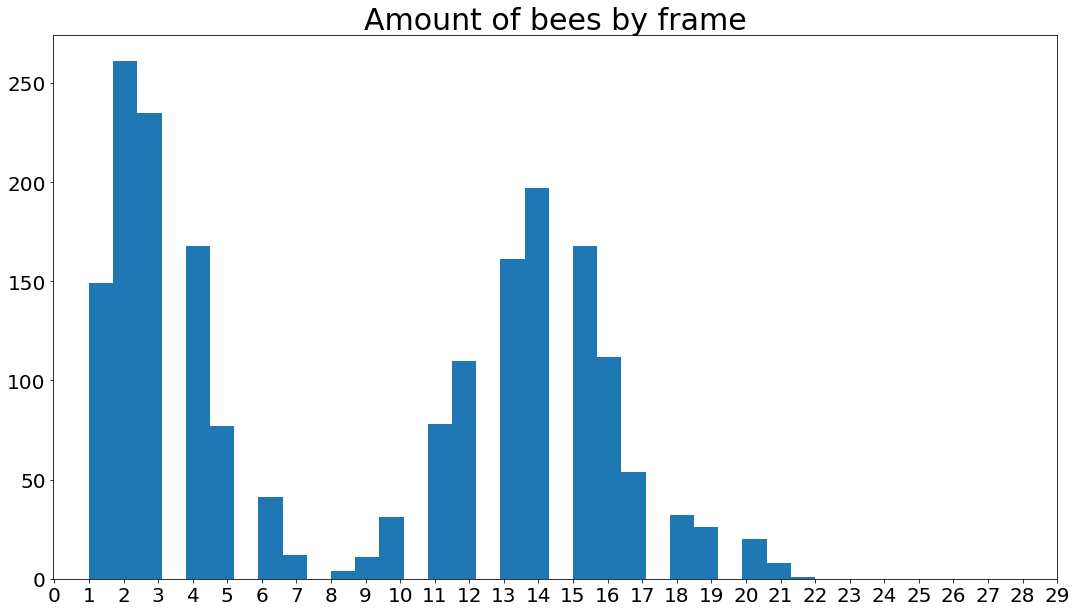

In [60]:
plt.figure(figsize=(18,10))
plt.title("Amount of bees by frame", fontsize=30)
plt.hist(abf_hist, bins=30)
plt.yticks(fontsize=20);
plt.xticks(np.arange(30), fontsize=20);

#### Saving stats for later

Creating a dataframe of frames and amount of bees on it.

In [61]:
ab_by_frames_df = pd.DataFrame({"frame" : list(amount_bees_by_frame.keys()),
                                "frame_bee_amount" : list(amount_bees_by_frame.values())})

In [62]:
ab_by_frames_df.head()

,frame,frame_bee_amount
0,016000,14
1,016001,13
2,016002,14
3,016003,14
4,016004,13


In [63]:
ab_by_frames_df.to_csv("../datasets/body_sept/amount_bees_by_frame_test_data.csv", index=False)

### Counting amount of bees by track

In [64]:
amount_bees_by_track = defaultdict(int)
for fname in images_list:
    track = get_track_id(fname)
    amount_bees_by_track[track] += 1

In [65]:
# amount of bees by track 
abt_hist = amount_bees_by_track.values()

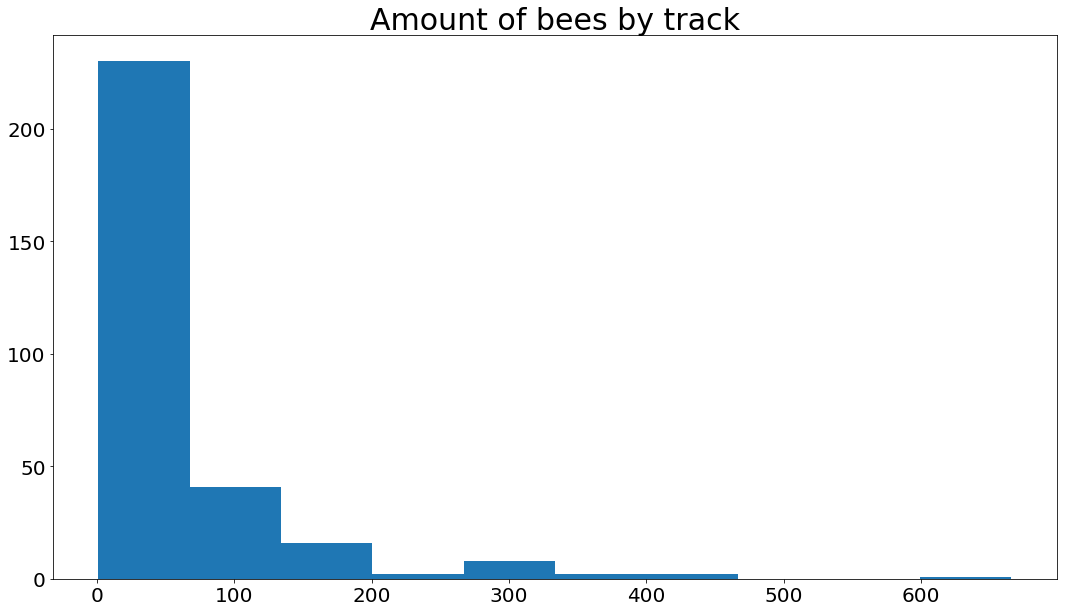

In [66]:
plt.figure(figsize=(18,10))
plt.title("Amount of bees by track", fontsize=30)
plt.hist(abt_hist)
plt.yticks(fontsize=20);
plt.xticks(fontsize=20);

#### Saving stats for later

Creating a dataframe of tracks and amount of bees on it.

In [67]:
ab_by_track_df = pd.DataFrame({"track" : list(amount_bees_by_track.keys()),
                                "track_bee_amount" : list(amount_bees_by_track.values())})

In [68]:
ab_by_track_df.head()

,track,track_bee_amount
0,002623,105
1,002765,410
2,002803,288
3,002959,1
4,002977,311


In [69]:
ab_by_track_df.to_csv("../datasets/body_sept/amount_bees_by_track_test_data.csv", index=False)

### Preparing a DataFrame with Frame and Track Info

In [70]:
# list of images
images_list;

In [71]:
# list of frame for each image
images_frame_list = [get_frame_id(im_file) for im_file in images_list]

In [72]:
# list of tracks for each image
images_track_list = [get_track_id(im_file) for im_file in images_list]

In [73]:
test_dataset_stats = pd.DataFrame({"filename" : images_list,
                                   "frame" : images_frame_list,
                                   "track" : images_track_list
                                  })

In [74]:
merged_df = test_dataset_stats.merge(ab_by_frames_df, on="frame", suffixes=["", "frame"])
merged_df = merged_df.merge(ab_by_track_df, on="track", suffixes=["", "track"])

SHOW all the images of the frame with highest amount of bees.

In [75]:
merged_df.sort_values(["frame_bee_amount", "track_bee_amount"], ascending=False).head(23)

,filename,frame,track,frame_bee_amount,track_bee_amount
389,Bee-016583-002765.jpg,016583,002765,22,410
1083,Bee-016583-002977.jpg,016583,002977,22,311
3519,Bee-016583-003091.jpg,016583,003091,22,305
4593,Bee-016583-003114.jpg,016583,003114,22,303
799,Bee-016583-002803.jpg,016583,002803,22,288
4191,Bee-016583-003106.jpg,016583,003106,22,156
4038,Bee-016583-003104.jpg,016583,003104,22,155
3885,Bee-016583-003102.jpg,016583,003102,22,154
5301,Bee-016583-003135.jpg,016583,003135,22,153
5181,Bee-016583-003132.jpg,016583,003132,22,116


#### Extracting ID using Frame and Track Information

We create ID dataset using the frame with highest amount of bees, and create a random sample of each trackId that appears in the selected frame.

In [76]:
def save_dataset(im_dir, out_dir, im_list):
    """
    Create the dataset folder with the images inside.
    """
    for im in im_list:
        path = os.path.join(im_dir, im)
        
        if not os.path.exists(path):
            print("{} not found.".format(path))
            continue
        else:
            out_im_path = os.path.join(out_dir, im)
            shutil.copyfile(path, out_im_path)
            #print("{} saved.".format(out_im_path))

def create_id_dataset(frame, images_dir, output_dir):
    # GET all tracks that appears in frame
    tracks = merged_df[merged_df.frame == frame].track.values
    sample_by_track = list()
    # Sample size == min(track_bee_amuount)
    sample_size = merged_df[merged_df.frame == frame].track_bee_amount.min()
    
    # Create a random sample of size "sample_size" 
    # for each trackID
    for tr in tracks:
        fnames = merged_df[merged_df.track == tr].filename.values
        amount = len(merged_df[merged_df.track == tr])
        
        perm = np.random.permutation(amount)[:sample_size]

        sample_by_track += list(fnames[perm])
    
    output_dir = os.path.join(output_dir, "ID_" + frame)
    
    if not os.path.exists(output_dir):
        os.mkdir(output_dir)
    
    save_dataset(images_dir, output_dir, sample_by_track)
    return

We sort thre frames by highest amount of bee on it.

In [77]:
sorted_frames = merged_df.sort_values(["frame_bee_amount"], ascending=False).frame.values

In [78]:
_, idx = np.unique(sorted_frames, return_index=True)
sorted_frames = sorted_frames[np.sort(idx)]

Show how stats filtered by frameID.

In [79]:
def show_tracks(f):
    return merged_df[merged_df.frame == f]
    
interact(show_tracks, f=sorted_frames)

interactive(children=(Dropdown(description='f', options=('016583', '016536', '016766', '016765', '016775', '01…

<function __main__.show_tracks(f)>

### We create 10 datasets using the top 10 frames with highest amount of bee on it.

In [80]:
for frame in sorted_frames[:10]:
    create_id_dataset(frame, "../raw_data/body_sept/", "../datasets/body_sept/ids_datasets");